# Discretization



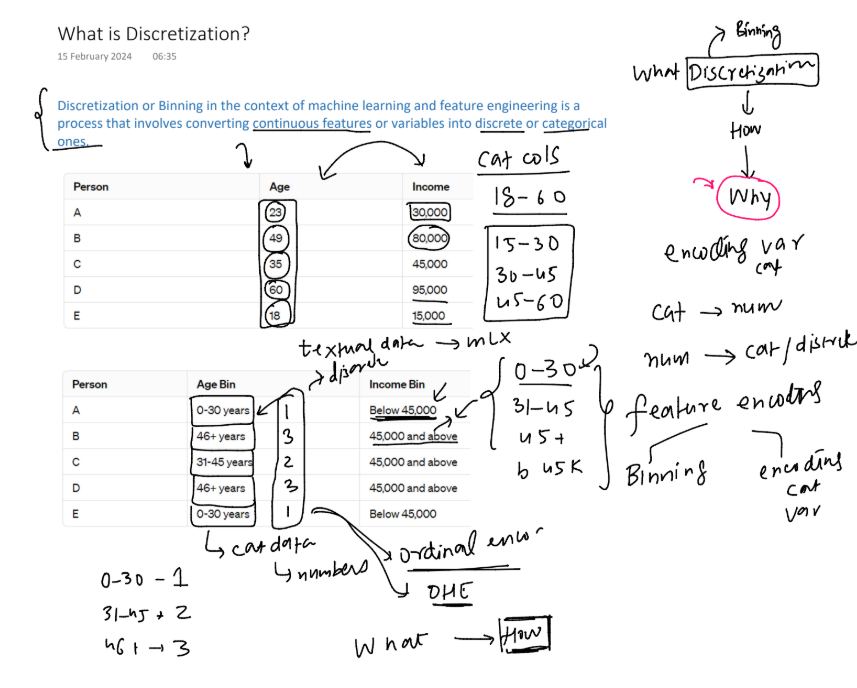

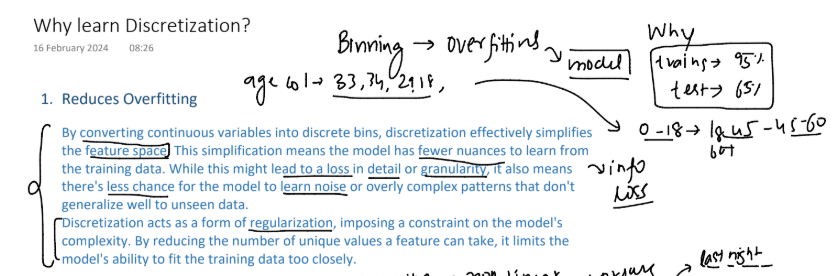
1. Reducing Overfitting

Original Feature - Train MSE: 280.367, Test MSE: 446.553
Discretized Feature - Train MSE: 339.937, Test MSE: 475.515


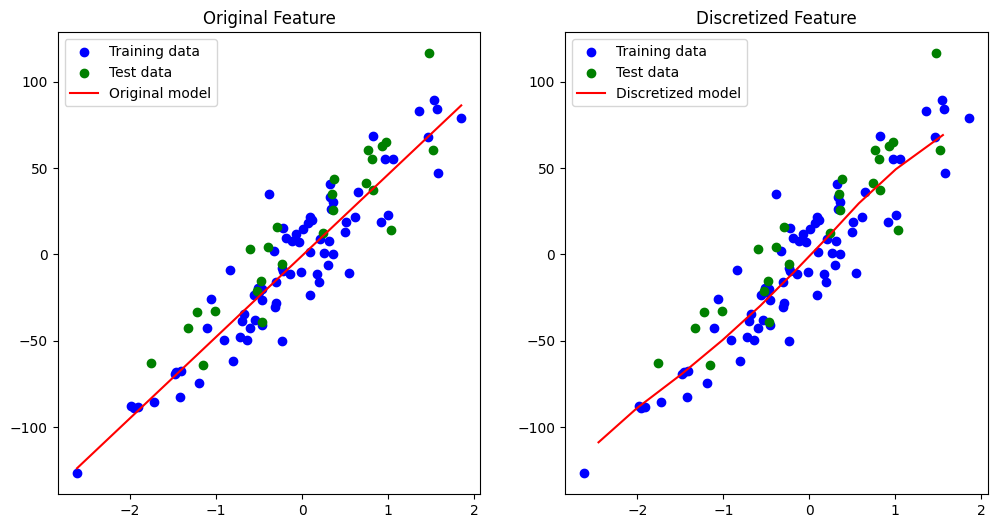

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear regression with the original feature
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_train_pred_orig = model_original.predict(X_train)
y_test_pred_orig = model_original.predict(X_test)

# Discretize the feature
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
X_train_disc = disc.fit_transform(X_train)
X_test_disc = disc.transform(X_test)

# Linear regression with the discretized feature
model_disc = LinearRegression()
model_disc.fit(X_train_disc, y_train)
y_train_pred_disc = model_disc.predict(X_train_disc)
y_test_pred_disc = model_disc.predict(X_test_disc)

# Calculate and print MSE for both models
mse_train_orig = mean_squared_error(y_train, y_train_pred_orig)
mse_test_orig = mean_squared_error(y_test, y_test_pred_orig)
mse_train_disc = mean_squared_error(y_train, y_train_pred_disc)
mse_test_disc = mean_squared_error(y_test, y_test_pred_disc)

print(f'Original Feature - Train MSE: {mse_train_orig:.3f}, Test MSE: {mse_test_orig:.3f}')
print(f'Discretized Feature - Train MSE: {mse_train_disc:.3f}, Test MSE: {mse_test_disc:.3f}')

# Plotting to visualize overfitting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(np.sort(X_train, axis=0), model_original.predict(np.sort(X_train, axis=0)), color='red', label='Original model')
plt.title('Original Feature')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
# For discretized model, predictions are plotted against the mid-point of each bin
bin_edges = disc.bin_edges_[0]
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_mids, model_disc.predict(disc.transform(bin_mids.reshape(-1, 1))), color='red', label='Discretized model')
plt.title('Discretized Feature')
plt.legend()

plt.show()


In original feature, we can see the model is giving good result in training but not in test which indicate overfitting. In discretized feature, overfitting is reduced but we also lost information while binning.

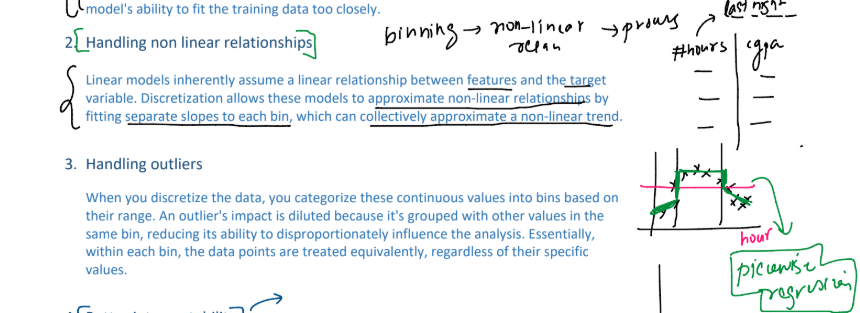

### 2. Handling Non-Linear Relationships

#### Example 1 - Regression

Shape of X: (100, 1)
Shape of y: (100, 1)


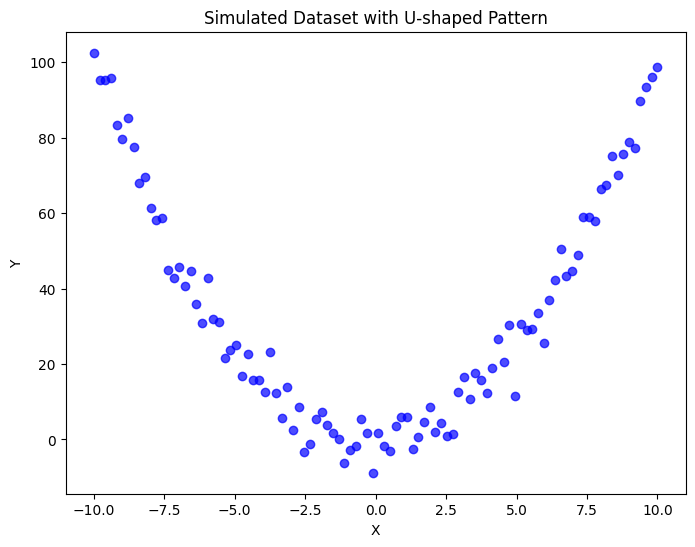

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error

# Ensure consistent environment
np.random.seed(42)

# Generate the dataset
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # X is a 100x1 vector
y = X**2 + np.random.normal(0, 5, size=X.shape[0]).reshape(-1,1)  # y is directly based on X, ensuring matching length

# Verify the shapes
print(f"Shape of X: {X.shape}")  # Should print (100, 1)
print(f"Shape of y: {y.shape}")  # Should print (100,)

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Simulated Dataset with U-shaped Pattern')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
# Fit non-discretized linear regression
model_nd = LinearRegression().fit(X, y)
y_pred_nd = model_nd.predict(X)

# Fit discretized linear regression
discretizer = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='quantile')
X_discrete = discretizer.fit_transform(X)

model_d = LinearRegression().fit(X_discrete, y)

X_discrete.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [ ]:
# Generate predictions for the original X values using the discretized model
y_pred_d = model_d.predict(X_discrete)

# Calculate MSE for both models using the correct set of predictions
mse_nd = mean_squared_error(y, y_pred_nd)  # No change needed here
mse_d = mean_squared_error(y, y_pred_d)  # Use corrected predictions

(mse_nd, mse_d)

(962.2105319929109, 314.458204161572)

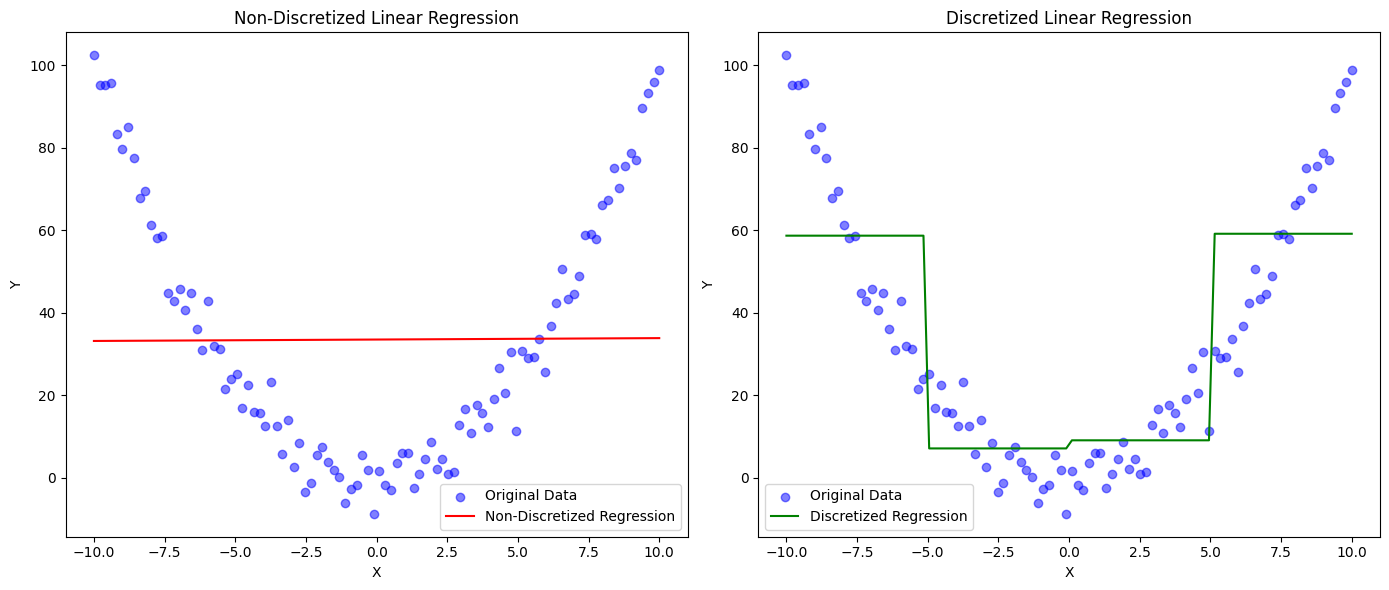

In [ ]:
# Plot the results
plt.figure(figsize=(14, 6))

# Non-discretized regression
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_nd, color='red', label='Non-Discretized Regression')
plt.title('Non-Discretized Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Discretized regression
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_d, color='green', label='Discretized Regression')
plt.title('Discretized Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

# Example 2 - Classification Problem

In [ ]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# Generate a 2D toy dataset with a non-linear decision boundary
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Logistic Regression on original features
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
accuracy_original = accuracy_score(y_test, preds)

# Discretization of the features
discretizer = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile')
X_train_binned = discretizer.fit_transform(X_train)
X_test_binned = discretizer.transform(X_test)

# Model 2: Logistic Regression on discretized features
lr_binned = LogisticRegression()
lr_binned.fit(X_train_binned, y_train)
preds_binned = lr_binned.predict(X_test_binned)
accuracy_binned = accuracy_score(y_test, preds_binned)

accuracy_original, accuracy_binned


(0.8766666666666667, 0.9566666666666667)

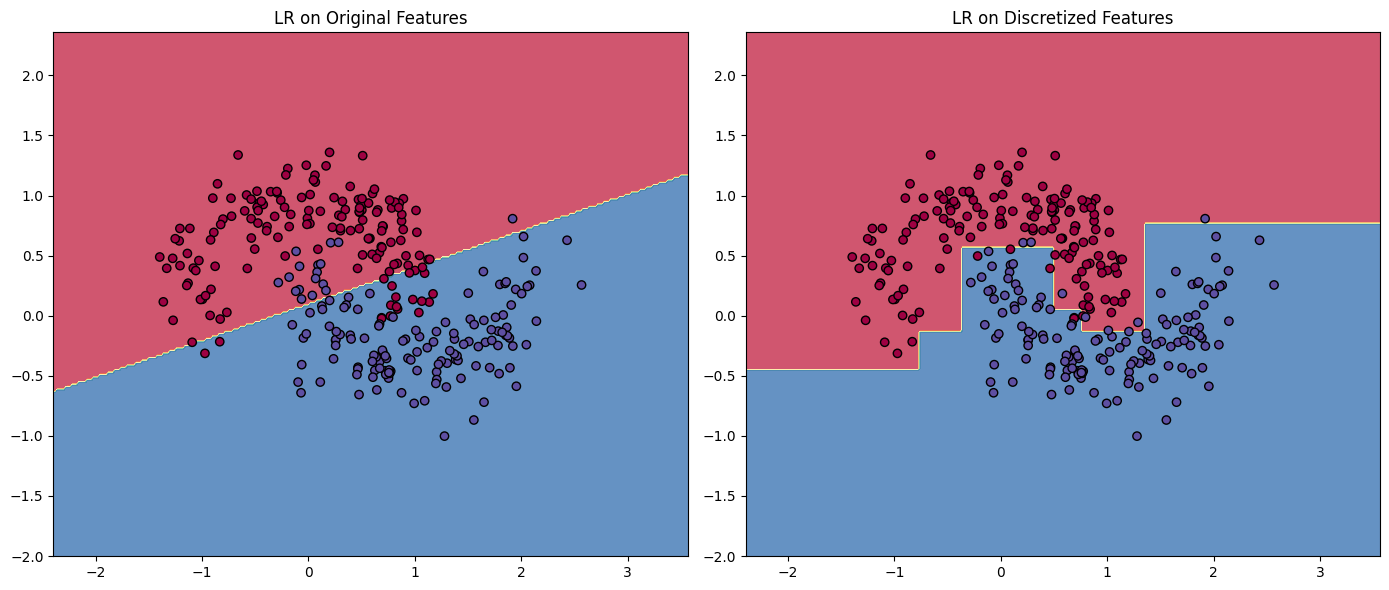

In [ ]:
import matplotlib.colors as mcolors

def plot_decision_boundary(model, X, y, ax, title="Decision Boundary", is_discretized=False, discretizer=None):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Preprocess mesh grid if model is trained on discretized features
    if is_discretized and discretizer:
        Z = model.predict(discretizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # Plot also the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    ax.set_title(title)
    ax.grid(False)

# Create figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot decision boundary for the original logistic regression model
plot_decision_boundary(lr, X_test, y_test, axs[0], "LR on Original Features")

# Plot decision boundary for the logistic regression model trained on discretized features
plot_decision_boundary(lr_binned, X_test, y_test, axs[1], "LR on Discretized Features", is_discretized=True, discretizer=discretizer)

plt.tight_layout()
plt.show()


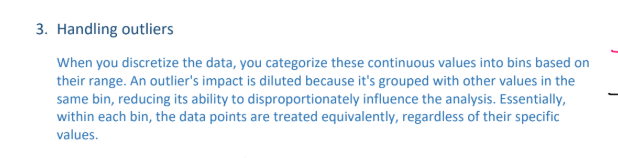

## Handling outliner

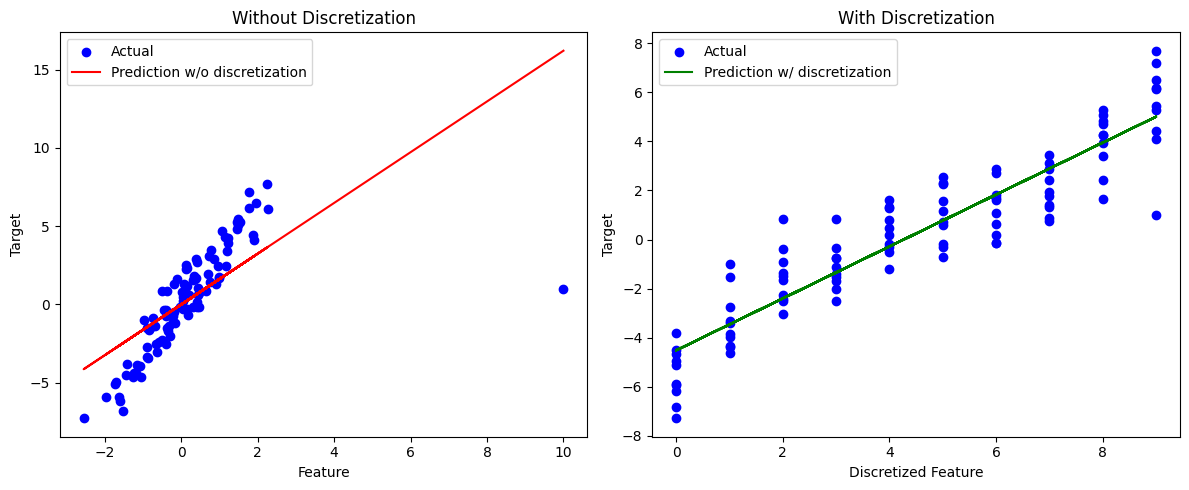

MSE without discretization: 5.63
MSE with discretization: 1.64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.random.normal(0, 1, size=(100, 1))
y = 3 * X.squeeze() + np.random.normal(0, 1, size=100)

# Introduce an outlier
X[99] = 10
y[99] = 1

# Apply linear regression directly
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Discretize the feature
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_disc = disc.fit_transform(X)

# Apply linear regression on the discretized feature
lin_reg_disc = LinearRegression()
lin_reg_disc.fit(X_disc, y)
y_pred_disc = lin_reg_disc.predict(X_disc)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Prediction w/o discretization')
plt.title('Without Discretization')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_disc, y, color='blue', label='Actual')
plt.plot(X_disc, y_pred_disc, color='green', label='Prediction w/ discretization')
plt.title('With Discretization')
plt.xlabel('Discretized Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and compare MSE
mse_without_disc = mean_squared_error(y, y_pred)
mse_with_disc = mean_squared_error(y, y_pred_disc)
print(f'MSE without discretization: {mse_without_disc:.2f}')
print(f'MSE with discretization: {mse_with_disc:.2f}')


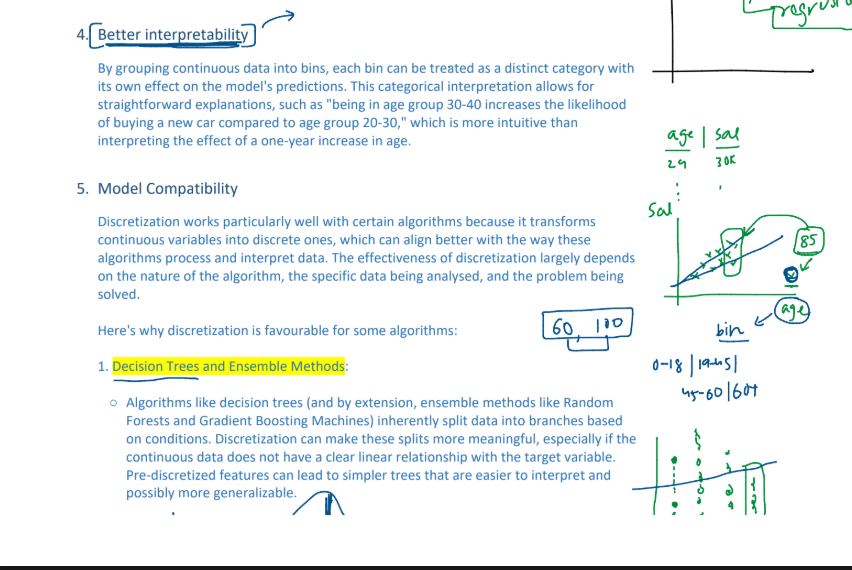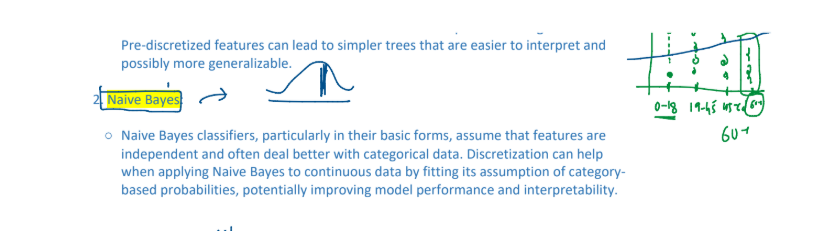

## Better Interpretability

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
data = data[['Age', 'Survived']].dropna()  # Focus on age and survival, dropping missing values
X = data[['Age']]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression on the original data
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
print(f'Accuracy without discretization: {accuracy_orig:.2f}')
print(f'Coefficient for the Age feature: {model.coef_[0][0]:.2f}')

# Discretize the 'age' feature with one-hot encoding
disc = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile')
X_train_disc = disc.fit_transform(X_train)
X_test_disc = disc.transform(X_test)

# Logistic Regression on the discretized data
model_disc = LogisticRegression()
model_disc.fit(X_train_disc, y_train)
y_pred_disc = model_disc.predict(X_test_disc)
accuracy_disc = accuracy_score(y_test, y_pred_disc)
print(f'Accuracy with discretization: {accuracy_disc:.2f}')

# Bin edges for age feature
bin_edges = disc.bin_edges_[0]

# Prepare bin labels with exact ranges
bin_labels = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Display coefficients for the discretized 'age' feature with exact ranges
coefficients = pd.DataFrame(model_disc.coef_.T, columns=['Coefficient'], index=bin_labels)
print(coefficients)


Accuracy without discretization: 0.60
Coefficient for the Age feature: -0.02
Accuracy with discretization: 0.61
               Coefficient
0.42 - 21.00      0.281509
21.00 - 28.50    -0.101095
28.50 - 39.00     0.098512
39.00 - 80.00    -0.272118


### Model Compatability

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
import time



In [ ]:
# Load the Wine Quality dataset
wine_data = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',delimiter=";")  # Adjust the path as necessary

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Split the data into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8


In [ ]:
# Experiment 1: Decision Tree on Continuous Features
start_time = time.time()
dtree_cont = DecisionTreeRegressor(random_state=42)
dtree_cont.fit(X_train, y_train)
training_time_cont = time.time() - start_time

y_pred_cont = dtree_cont.predict(X_test)
mse = mean_squared_error(y_test, y_pred_cont)



# Output the results
print(f"Continuous Features - Training Time: {training_time_cont:.4f} seconds, MSE: {mse:.4f}")

Continuous Features - Training Time: 0.0148 seconds, MSE: 0.6250


In [ ]:
# Experiment 2: Discretizing Features
discretizer = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')
X_train_binned = discretizer.fit_transform(X_train)
X_test_binned = discretizer.transform(X_test)

X_train_binned

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
start_time = time.time()
dtree_binned = DecisionTreeRegressor(random_state=42)
dtree_binned.fit(X_train_binned, y_train)
training_time_binned = time.time() - start_time

y_pred_binned = dtree_binned.predict(X_test_binned)
mse_binned = mean_squared_error(y_test, y_pred_binned)


print(f"Discretized Features - Training Time: {training_time_binned:.4f} seconds, MSE: {mse_binned:.4f}")

Discretized Features - Training Time: 0.0091 seconds, MSE: 0.7183


### Types of Discretization

## 1. Custom Binning

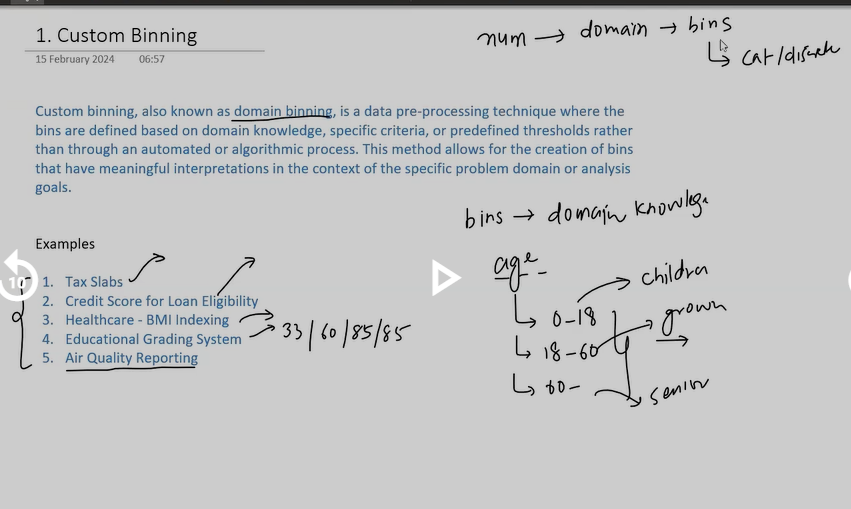

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
data = data[['Age', 'Survived']].dropna()

data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [ ]:
age_bins=[0,18,60,100]
age_lebels=['child','adult','senior']

In [ ]:
data['Age_group']=pd.cut(data['Age'],bins=age_bins,labels=age_lebels,right=False) # It will take 0-17 in first bin,exclude 18

In [ ]:
data.sample(5)

,Age,Survived,Age_group
794,25.0,0,adult
553,22.0,1,adult
748,19.0,0,adult
172,1.0,1,child
294,24.0,0,adult


## Uniform Binning

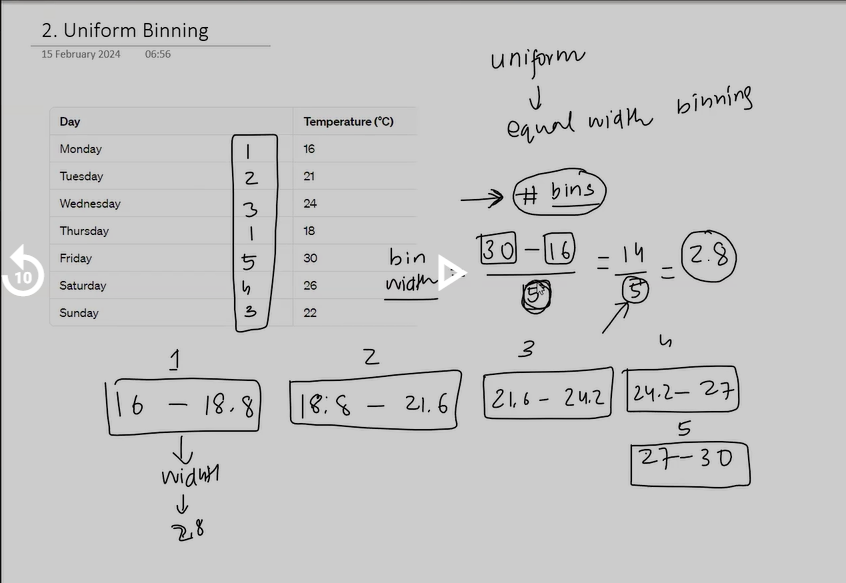

In [ ]:
# When distribution of data is uniform, it should be used.It can be used as base binning and compare with other techniques.

In [ ]:
Wdf = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
dis= KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')

X_train_binned = pd.DataFrame(dis.fit_transform(X_train), columns=dis.get_feature_names_out())
X_test_binned = pd.DataFrame(dis.transform(X_test), columns=dis.get_feature_names_out())

X_train_binned.head()

,Age
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


In [ ]:
dis.bin_edges_ # jotogulo column e apply korbo, vitore totogulo array thakbe

array([array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])],
      dtype=object)

In [ ]:
dis.bin_edges_.shape

(1,)

In [ ]:
dis.bin_edges_[0]

array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])

In [ ]:
import matplotlib.pyplot as plt


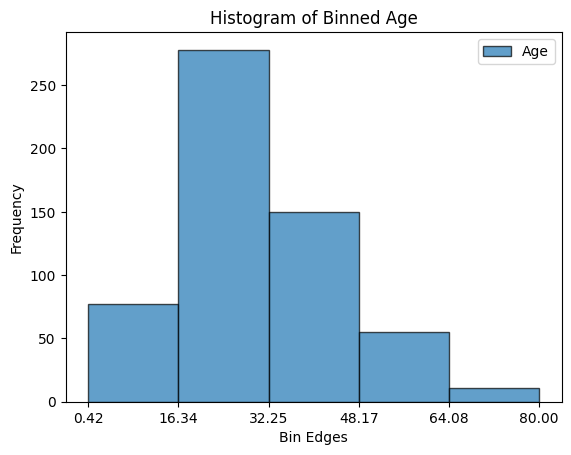

In [ ]:
plt.hist(X_train['Age'], bins=dis.bin_edges_[0], alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(dis.bin_edges_[0])
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Sex', 'Survived']]

df.head()

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [ ]:
# 1. Fill null value of age with mean
# 2. Discretize age
# 3. One hot encode Sex

X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Sex']], df['Survived'], test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
clf1=ColumnTransformer(
    [
        ('impute_age',SimpleImputer(strategy='mean'),['Age']),
        ('ohe_sex',OneHotEncoder(sparse_output=False),['Sex'])
    ]
)

In [ ]:
clf2=ColumnTransformer(
    [
    ('discrit',KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform'),[0]) # transformer returns numpy array, so ['Age'] is not in the output of clf1 as it turned into numpy array
    ],
    remainder='passthrough')

In [ ]:
pipe=Pipeline(steps=[
    ('impt_and_ohe',clf1),
    ('discritization',clf2)
])


In [ ]:
pipe.fit_transform(X_train)

array([[2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       ...,
       [2., 0., 1.],
       [0., 1., 0.],
       [1., 0., 1.]])

In [ ]:
# Another approach

# Pipeline for processing the 'Age' column
age_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform'))  # Then bin the data
])

# ColumnTransformer for applying different transformations
preprocessor = ColumnTransformer(transformers=[
    ('age', age_pipeline, ['Age']),  # Apply age_pipeline to 'Age'
    ('sex', OneHotEncoder(), ['Sex'])  # Apply OneHotEncoder to 'Sex'
])

from sklearn.linear_model import LogisticRegression

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())  # Use logistic regression as the model
])

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3,
                                                                                    strategy='uniform'))]),
                                                  ['Age']),
                                                 ('sex', OneHotEncoder(),
                                                  ['Sex'])])),
                ('model', LogisticRegression())])

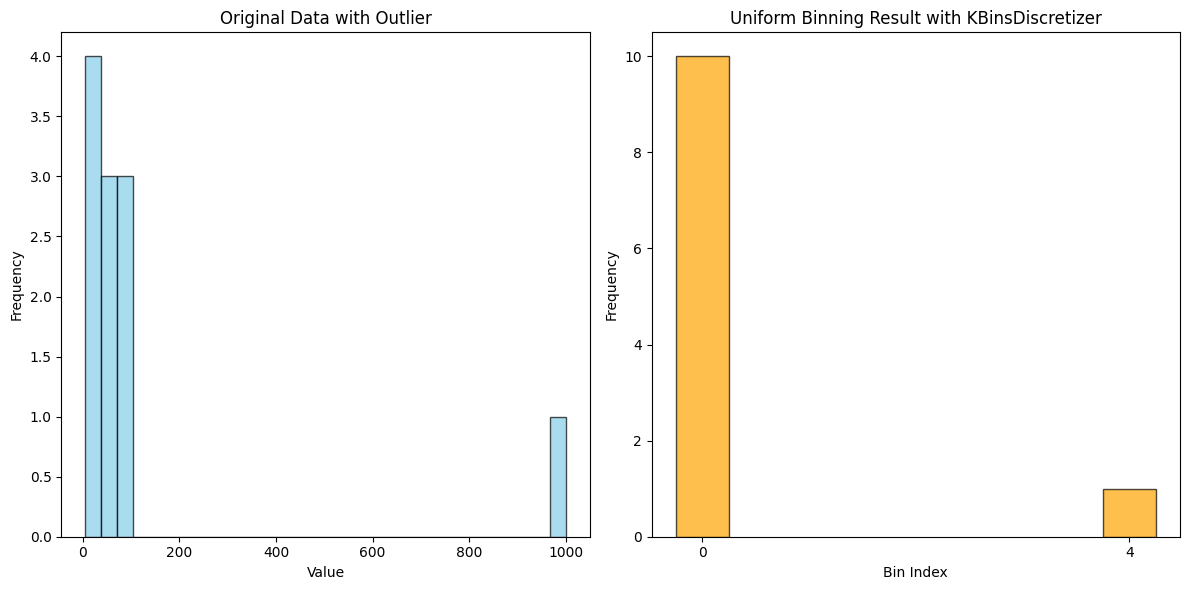

In [ ]:
# Uniform binning create problem when there is outlier in data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


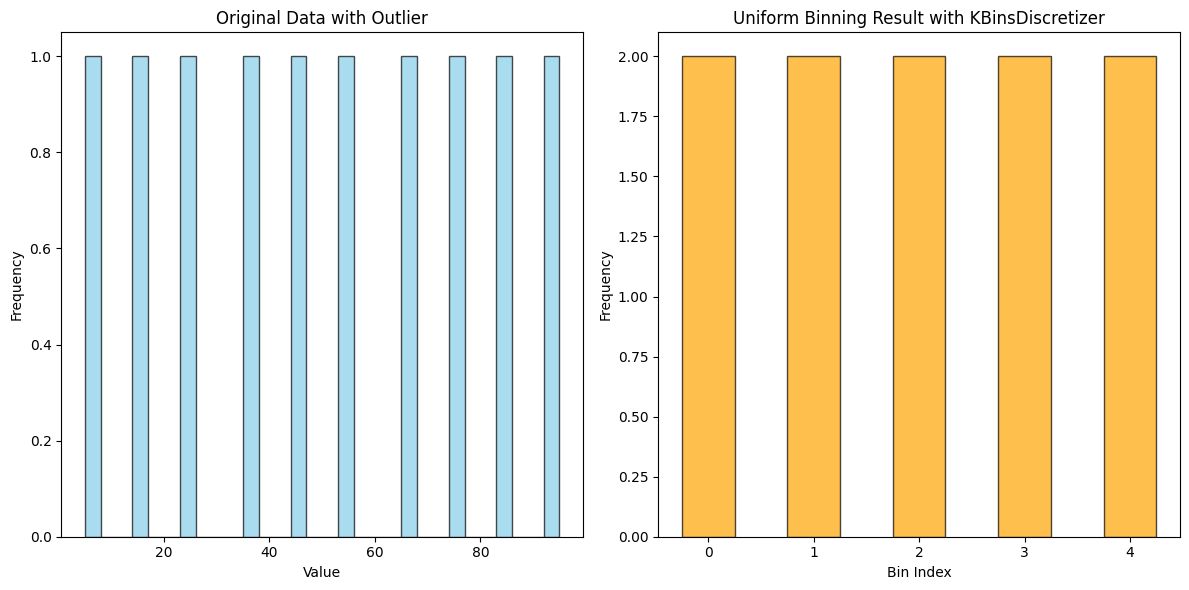

In [ ]:
# without outliner

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


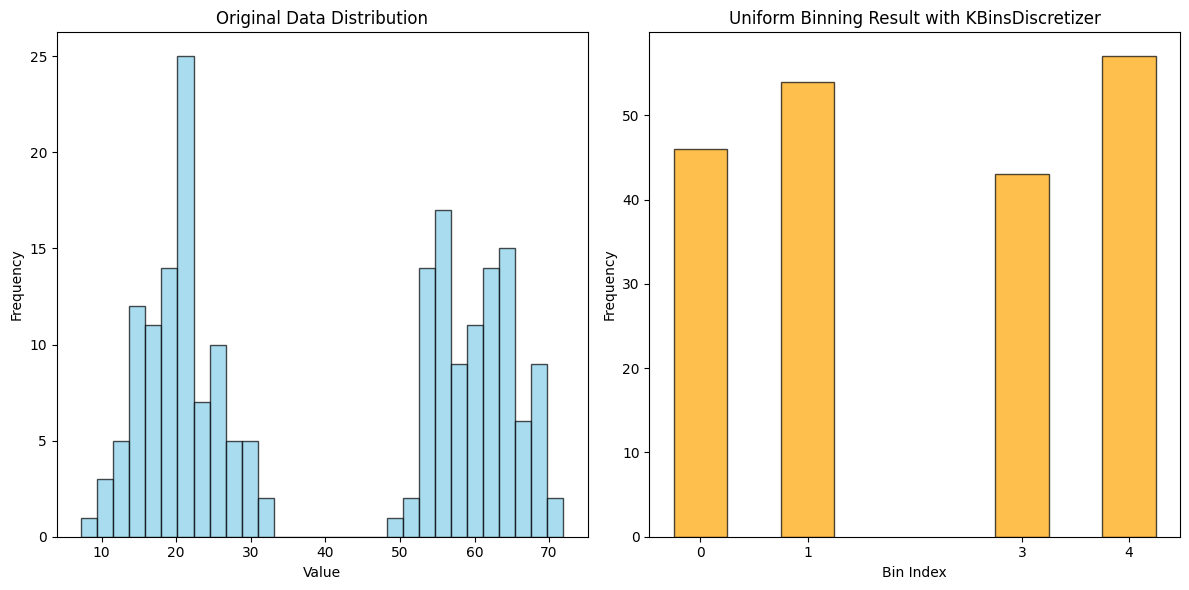

In [ ]:
# problem 2 - not adaptive-> it do not consider what is the distribution of the data, it just perform its task.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


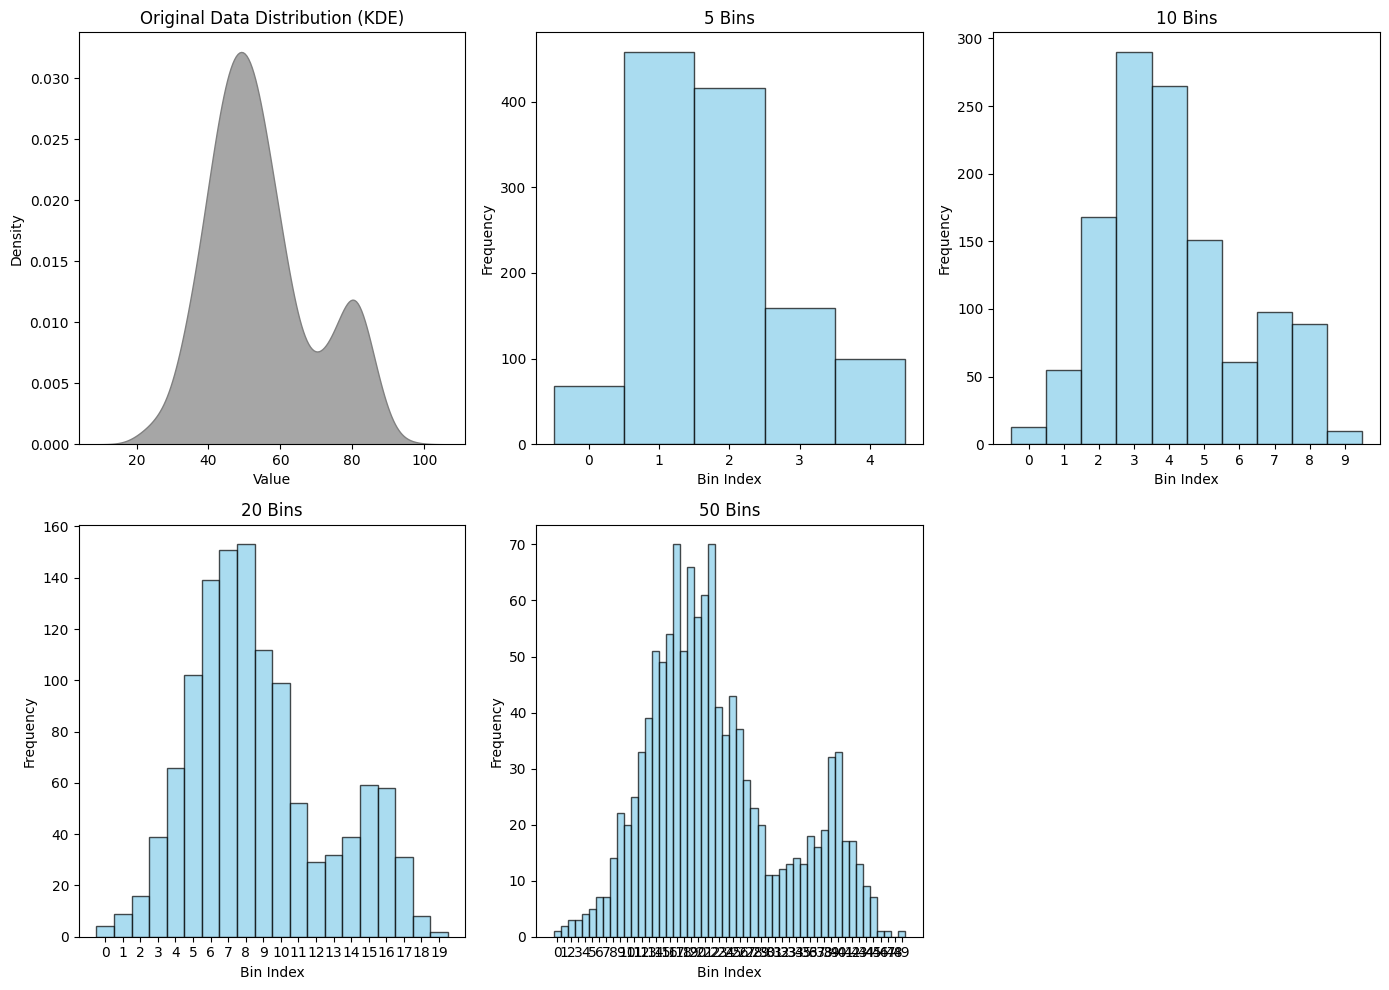

In [ ]:
# Problem #3 - Seelcting # of bins-> less bin will lose much data, more been will return noise like original data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generate a normally distributed dataset with an additional cluster
data_normal = np.random.normal(loc=50, scale=10, size=1000)
data_cluster = np.random.normal(loc=80, scale=5, size=200)
data = np.concatenate([data_normal, data_cluster]).reshape(-1, 1)  # Reshape for KBinsDiscretizer

# Different choices for the number of bins
bin_choices = [5, 10, 20, 50]

plt.figure(figsize=(14, 10))

# Plot the original data distribution using KDE
plt.subplot(2, 3, 1)
sns.kdeplot(data[:, 0], fill=True, color='gray', alpha=0.7)
plt.title('Original Data Distribution (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')

# Apply KBinsDiscretizer and plot histograms for each bin choice
for i, n_bins in enumerate(bin_choices, start=2):
    # Initialize and fit the KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    data_binned = discretizer.fit_transform(data)

    # Plot histogram of the binned data
    plt.subplot(2, 3, i)
    # We plot the binned data by the bin indices and need to calculate the bin width for plotting
    bin_edges = discretizer.bin_edges_[0]
    plt.hist(data_binned, bins=np.arange(len(bin_edges)), align='left', color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{n_bins} Bins')
    plt.xlabel('Bin Index')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(len(bin_edges) - 1))

plt.tight_layout()
plt.show()


# 3. Quantile binning

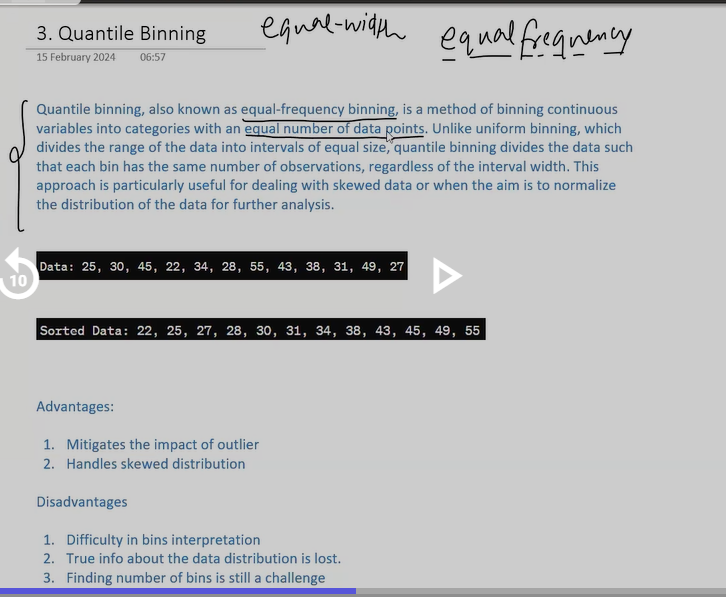

In [ ]:
data = np.array([22, 25, 27, 28, 30, 31, 34, 38, 43, 45, 49, 55])
data

array([22, 25, 27, 28, 30, 31, 34, 38, 43, 45, 49, 55])

In [ ]:
np.percentile(data,25)

np.float64(27.75)

In [ ]:
np.percentile(data,50)

np.float64(32.5)

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

X_train_binned = pd.DataFrame(discretizer.fit_transform(X_train), columns=discretizer.get_feature_names_out())
X_test_binned = pd.DataFrame(discretizer.transform(X_test), columns=discretizer.get_feature_names_out())

X_train_binned.head()


,Age
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0


In [ ]:
discretizer.bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

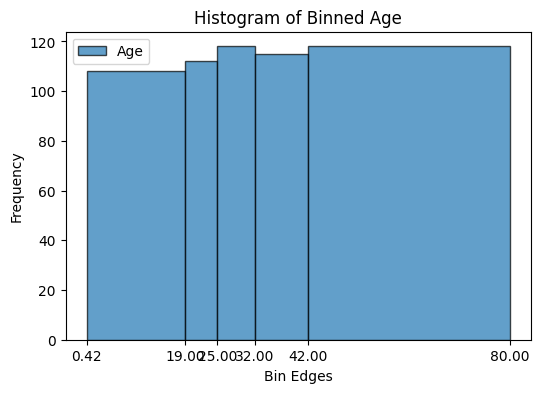

In [ ]:
import matplotlib.pyplot as plt

# Extract the bin edges for the 'Age' feature from the nested array structure
age_bin_edges = discretizer.bin_edges_[0]

plt.figure(figsize=(6, 4))
# Use the extracted bin edges for plotting
plt.hist(X_train['Age'], bins=age_bin_edges, alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(age_bin_edges)
plt.legend()
plt.show()

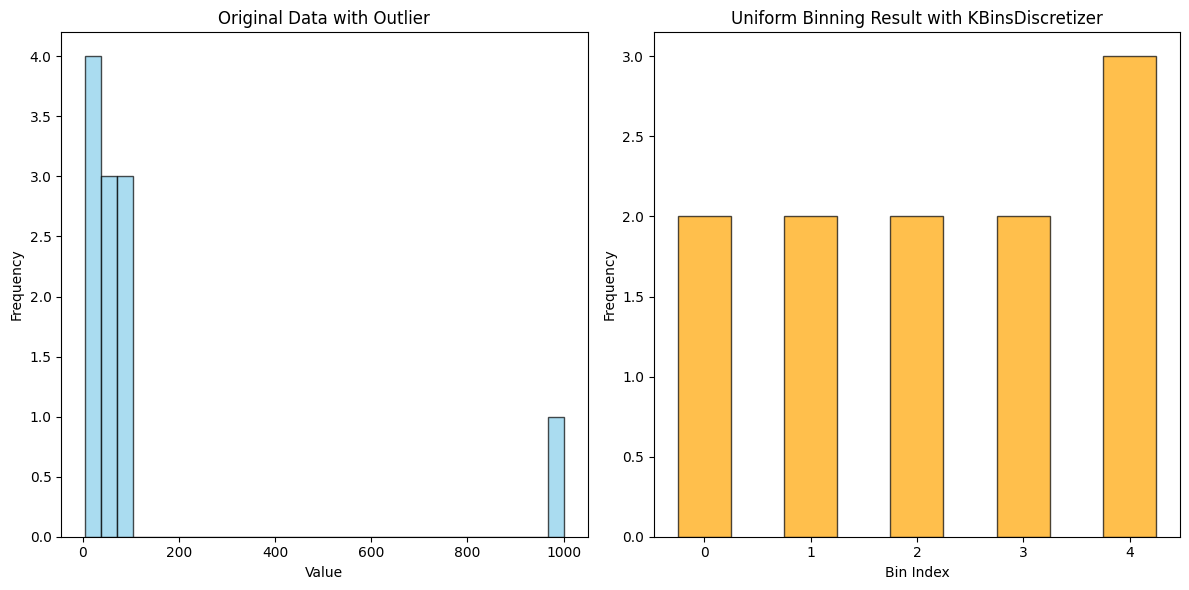

In [ ]:
# impact of outlliers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


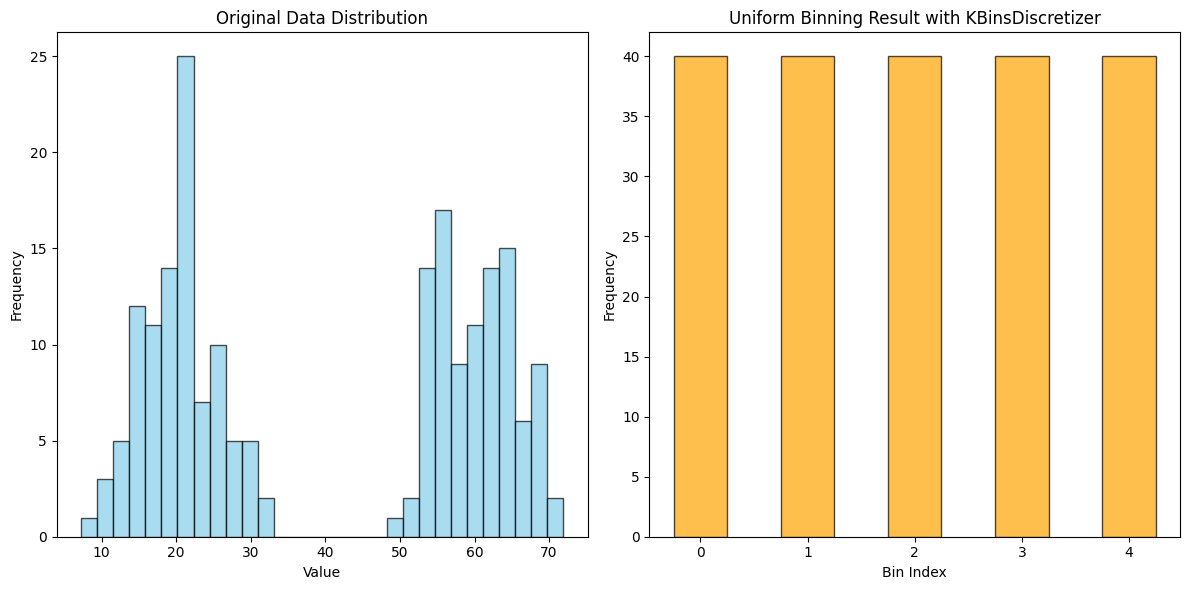

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


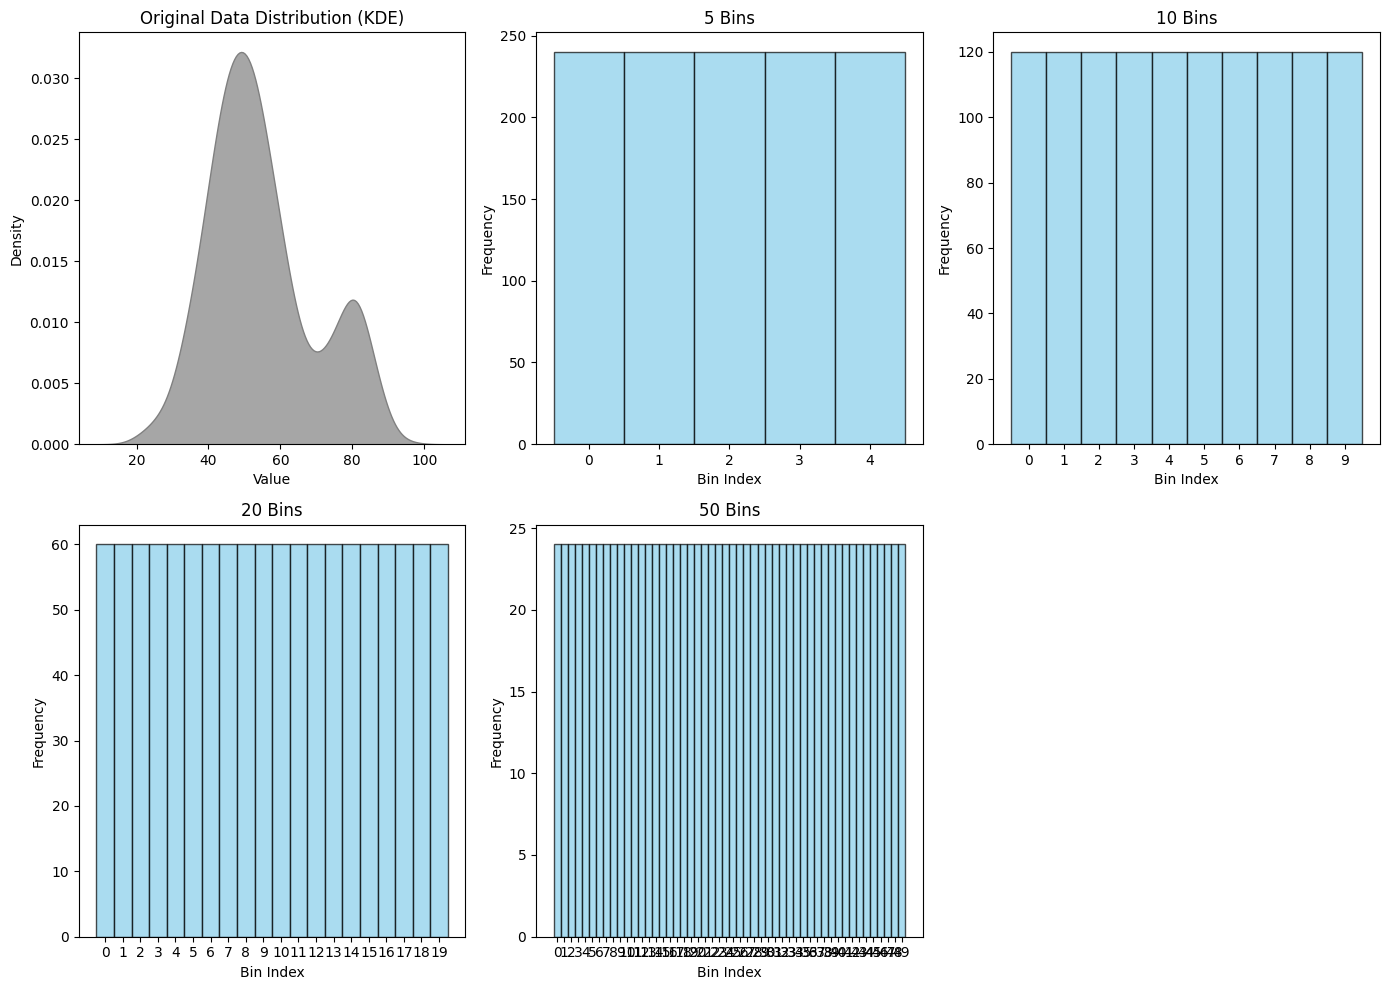

In [ ]:
# Problem #3 - Seelcting # of bins

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generate a normally distributed dataset with an additional cluster
data_normal = np.random.normal(loc=50, scale=10, size=1000)
data_cluster = np.random.normal(loc=80, scale=5, size=200)
data = np.concatenate([data_normal, data_cluster]).reshape(-1, 1)  # Reshape for KBinsDiscretizer

# Different choices for the number of bins
bin_choices = [5, 10, 20, 50]

plt.figure(figsize=(14, 10))

# Plot the original data distribution using KDE
plt.subplot(2, 3, 1)
sns.kdeplot(data[:, 0], fill=True, color='gray', alpha=0.7)
plt.title('Original Data Distribution (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')

# Apply KBinsDiscretizer and plot histograms for each bin choice
for i, n_bins in enumerate(bin_choices, start=2):
    # Initialize and fit the KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    data_binned = discretizer.fit_transform(data)

    # Plot histogram of the binned data
    plt.subplot(2, 3, i)
    # We plot the binned data by the bin indices and need to calculate the bin width for plotting
    bin_edges = discretizer.bin_edges_[0]
    plt.hist(data_binned, bins=np.arange(len(bin_edges)), align='left', color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{n_bins} Bins')
    plt.xlabel('Bin Index')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(len(bin_edges) - 1))

plt.tight_layout()
plt.show()


## 3. KMeans binning

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

X_train_binned = pd.DataFrame(discretizer.fit_transform(X_train), columns=discretizer.get_feature_names_out())
X_test_binned = pd.DataFrame(discretizer.transform(X_test), columns=discretizer.get_feature_names_out())

X_train_binned.head()

,Age
0,2.0
1,1.0
2,2.0
3,2.0
4,1.0


In [ ]:
discretizer.bin_edges_

array([array([ 0.42      , 12.69636862, 27.02765256, 39.35418895, 54.21464646,
              80.        ])                                                   ],
      dtype=object)

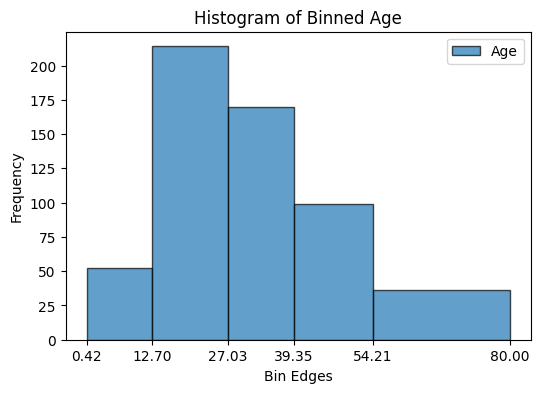

In [ ]:
import matplotlib.pyplot as plt

# Extract the bin edges for the 'Age' feature from the nested array structure
age_bin_edges = discretizer.bin_edges_[0]

plt.figure(figsize=(6, 4))
# Use the extracted bin edges for plotting
plt.hist(X_train['Age'], bins=age_bin_edges, alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(age_bin_edges)
plt.legend()
plt.show()

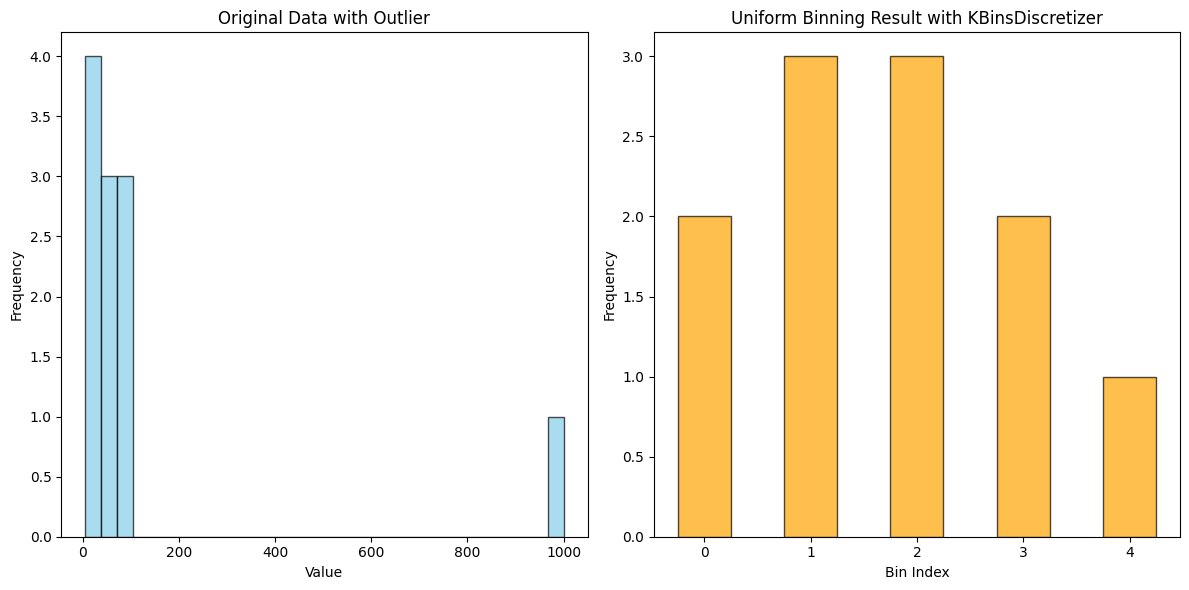

In [ ]:
# impact of outlliers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


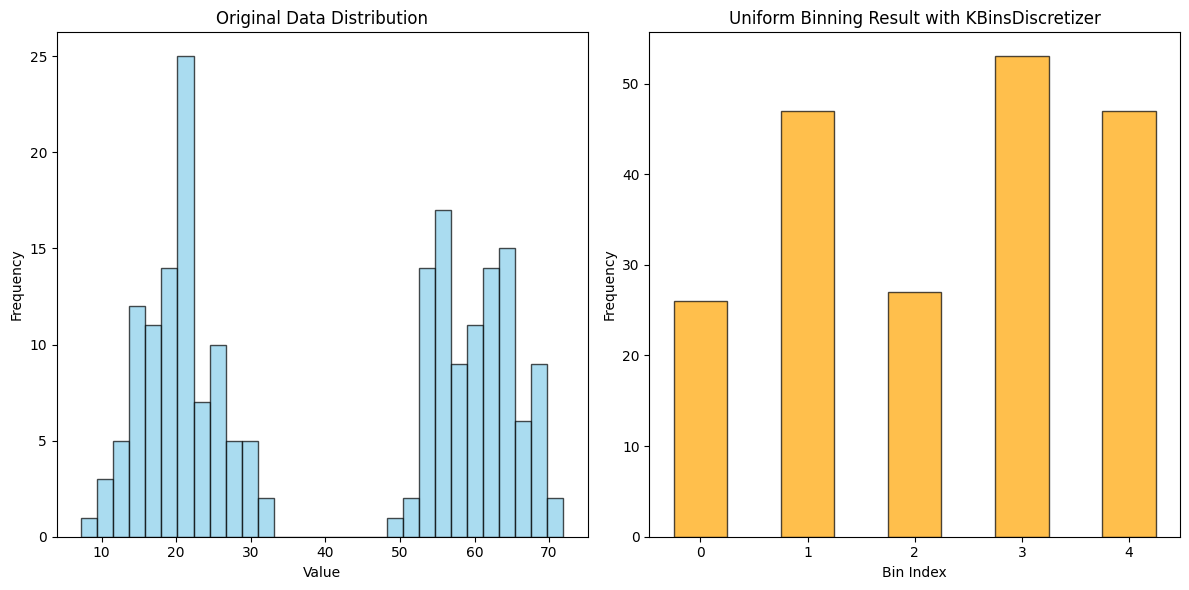

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


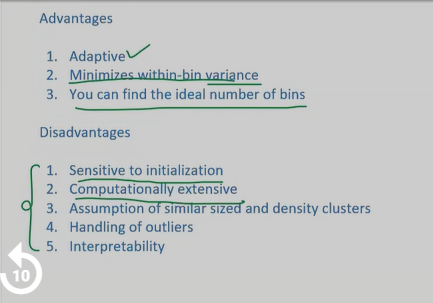

### Threshod binning or Binarization

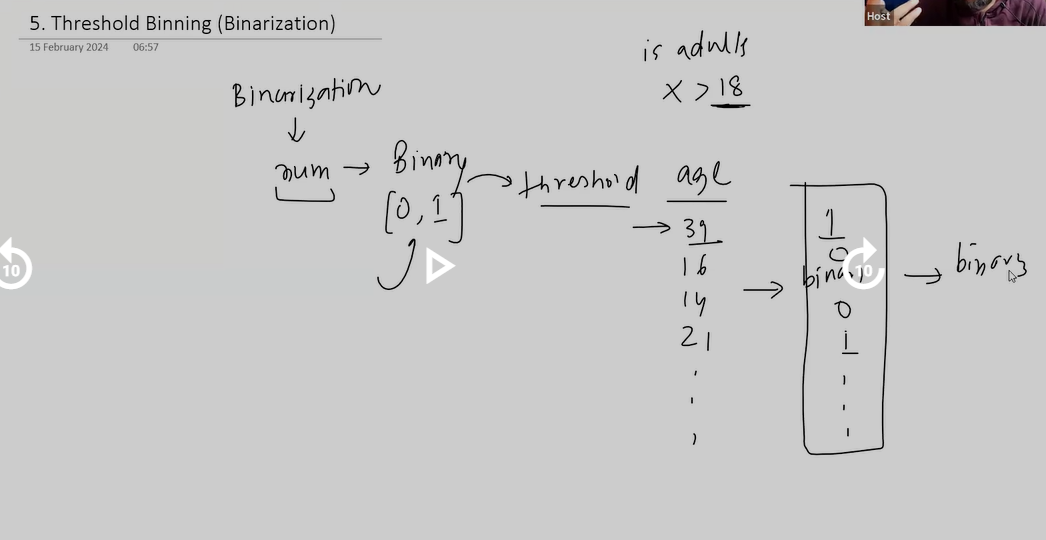

In [ ]:
#  Threshold er shathe compare kore 0,1 banabe
#  Bag of word e word ache ki nai situation e use kora jabe, kunu specific pixel er upor hole black banabo, niche hole white banabo - amon situation e kaj kore.

from sklearn.preprocessing import Binarizer

# Sample data
data = [[-1, 2, -3], [5, -6, 7]]

# Initialize the Binarizer with a threshold of 0
binarizer = Binarizer(threshold=1) # 1 er niche hole 0 hoye jabe, upore hole 1 hoye jabe

# Transform the data
binary_data = binarizer.fit_transform(data)

print(binary_data)


[[0 1 0]
 [1 0 1]]


# Decision Tree binning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Sample data (feature and target)
X = np.array([[6], [12], [14], [18], [22], [24], [29], [33], [37], [40]])
y = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])  # Binary target for simplicity

# Train a decision tree on the data
tree = DecisionTreeClassifier(max_leaf_nodes=4)  # Restricting tree size for simple binning
tree.fit(X, y)



DecisionTreeClassifier(max_leaf_nodes=4)

[Text(0.4, 0.875, 'x[0] <= 16.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[0] <= 26.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 23.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

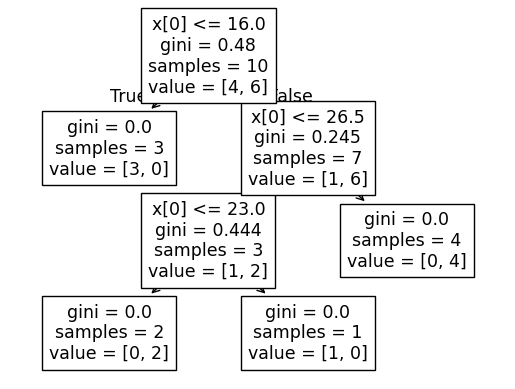

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree)

In [ ]:
tree.tree_.threshold # -2 is leaf node

array([16. , -2. , 26.5, 23. , -2. , -2. , -2. ])

In [ ]:
# Extract split points (thresholds) from the tree to define bin edges
split_points = tree.tree_.threshold[tree.tree_.threshold != -2]
split_points

array([16. , 26.5, 23. ])

In [ ]:
# Add the minimum and maximum values to cover the full range of X
bin_edges = np.sort(np.concatenate(([X.min()], split_points, [X.max()])))

print("Bin edges:", bin_edges)

Bin edges: [ 6.  16.  23.  26.5 40. ]


In [ ]:
# Function to assign bins
def assign_bins(data, edges):
    bins = np.digitize(data, edges, right=False)  # Assign bins based on edges
    # Adjusting bins to be 1-indexed instead of 0-indexed
    # and ensuring values fall into n_bins categories
    bins = np.clip(bins, 1, len(edges)-1)
    return bins

In [ ]:
# Assign each data point to a bin
bins_assigned = assign_bins(X, bin_edges)

# Print the assigned bins for each data point
for value, bin_num in zip(X.flatten(), bins_assigned):
    print(f"Value: {value} assigned to Bin: {bin_num}")

Value: 6 assigned to Bin: [1]
Value: 12 assigned to Bin: [1]
Value: 14 assigned to Bin: [1]
Value: 18 assigned to Bin: [2]
Value: 22 assigned to Bin: [2]
Value: 24 assigned to Bin: [3]
Value: 29 assigned to Bin: [4]
Value: 33 assigned to Bin: [4]
Value: 37 assigned to Bin: [4]
Value: 40 assigned to Bin: [4]


In [ ]:
#  https://feature-engine.trainindata.com/en/latest/api_doc/discretisation/DecisionTreeDiscretiser.html